# Градиентный спуск и его модификации
### Выбрать тестовые функции оптимизации (2 шт)
### Запрограммировать собственнуб реализацию классического градиентного спуска
### Запрограммировать пайлайн тестирования алгоритма оптимизации
- Визуализации функции и точки оптимума
- Вычисление погрешности найденного решения в сравнение с аналитическим для нескольких запусков
- Визуализации точки найденного решения (можно добавить анимацию на плюс балл)

### Запрограммировать метод вычисления градиента
- Передача функции градиента от пользователя
- Символьное вычисление градиента (например с помощью sympy) (на доп балл)
- Численная аппроксимация градиента (на доп балл)

### Запрограммировать одну моментную модификацию и протестировать ее
### Запрограммировать одну адаптивную модификацию и протестировать ее
### Запрограммировать метод эволюции темпа обучения и/или метод выбора начального приближения и протестировать их

In [ ]:
import numpy as np
import sympy
import math
import matplotlib.pyplot as plt
from tabulate import tabulate
import random

Функция Бута

In [ ]:
def function_boot(x: np.ndarray, y: np.ndarray) -> float:
  res = (x + 2 * y - 7) ** 2 + (2 * x + y -5) ** 2
  return res

def function_boot_dx(x: np.ndarray, y: np.ndarray) -> float:
  res = 10 * x + 8 * y - 34
  return res

def function_boot_dy(x: np.ndarray, y: np.ndarray) -> float:
  res = 10 * y + 8 * x - 38
  return res

Функция Букина №6

In [ ]:
def function_bukin_N6(x: np.ndarray, y: np.ndarray) -> float:
  res = 100 * np.sqrt(abs(y - 0.01 * x ** 2)) - 0.01 * abs(x + 10)
  return res

def function_bukin_N6_dx(x: np.ndarray, y: np.ndarray) -> float:
  res = (50.0 * (y - x ** 2 / 100.0)) / (abs(y - x ** 2 / 100.0)) ** (3 / 2)
  return res

def function_bukin_N6_dy(x: np.ndarray, y: np.ndarray) -> float:
  res = (x * (x ** 2 / 100.0 - y)) / (abs(x ** 2 / 100 - y) ** (3 / 2)) - (x + 10.0) / (100.0 * abs(x + 10.0))
  return res

In [ ]:
def symbolic_gradient(expression, variables):
    vars = sympy.symbols(variables)
    symbolic_function = sympy.sympify(expression)
    gradient = [sympy.diff(symbolic_function, var) for var in vars]

    def function_dx(*args):

        subs = {var: val for var, val in zip(vars, args)}
        return float(gradient[0].subs(subs))

    def function_dy(*args):

        subs = {var: val for var, val in zip(vars, args)}
        return float(gradient[1].subs(subs))

    return function_dx, function_dy

In [ ]:
boot = '(x + 2 * y - 7) ** 2 + (2 * x + y -5) ** 2'
bukin_N6 = '100 * sqrt(abs(y - 0.01 * x ** 2)) - 0.01 * abs(x + 10)'
variables = 'x y'
result_boot = symbolic_gradient(boot, variables)
result_bukin_N6 = symbolic_gradient(bukin_N6, variables)
print(result_boot[0](1.0, 3.0))
print(result_boot[1](1.0, 3.0))

0.0
0.0


In [ ]:
def my_GD(x_0: float, y_0: float, use_grad: bool = True, lr: float = 1e-3, T: int = 10000, **kwargs) -> np.ndarray:

  f = kwargs['f']
  if use_grad:
    dfdx = kwargs['dfdx']
    dfdy = kwargs['dfdy']
  else:
    raise NotImplementedError()

  x_old = x_0
  y_old = y_0
  for _ in range(T):

    x_new = x_old - lr * dfdy(x_old, y_old)
    y_new = y_old - lr * dfdy(x_old, y_old)

    x_old = x_new
    y_old = y_new

  return x_new, y_new, f(x_new, y_new)


In [ ]:
def plot(func, x_0, x_1, y_0, y_1, point_min, point_gd):
  x = np.linspace(x_0, x_1, 1000)
  y = np.linspace(y_0, y_1, 1000)
  X, Y = np.meshgrid(x, y)
  Z = func(X, Y)
  fig = plt.figure()
  ax = fig.add_subplot(projection ='3d')
  ax.scatter(point_min[0], point_min[1], point_min[2], color = "black")
  ax.scatter(point_gd[0], point_gd[1], point_gd[2], color = "brown")
  ax.plot_surface(X, Y, Z, cmap ='hsv', alpha = 0.6)
  ax.set_title('Визуализация функции и точки оптимума');

In [ ]:
res_boot = my_GD(5.0, 10.0, f = function_boot, dfdx = function_boot_dx, dfdy = function_boot_dy)
print(res_boot)

(-0.6666666666666862, 4.333333333333354, 5.000000000000117)


In [ ]:
res_boot = my_GD(5.0, 10.0, f = function_boot, dfdx = result_boot[0], dfdy = result_boot[1])
print(res_boot)

(-0.6666666666666862, 4.333333333333354, 5.000000000000117)


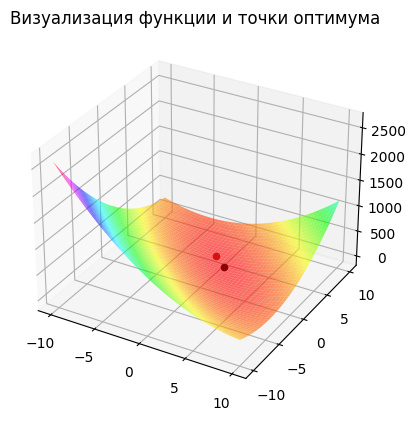

In [ ]:
plot(function_boot, -10.0, 10.0, -10.0, 10.0, (1.0, 3.0, 0.0), res_boot)

In [ ]:
data = []
for i in range(10):
  x = random.uniform(-10.0, 10.0)
  y = random.uniform(-10.0, 10.0)
  res_boot = my_GD(x, y, f = function_boot, dfdx = function_boot_dx, dfdy = function_boot_dy)
  data.append([i + 1, float(res_boot[2] - 0.0)])

head = ["Запуск", "Погрешность"]
print(tabulate(data, headers=head, tablefmt="grid"))

+----------+---------------+
|   Запуск |   Погрешность |
+==========+===============+
|        0 |     12.5887   |
+----------+---------------+
|        1 |      3.60862  |
+----------+---------------+
|        2 |      7.62174  |
+----------+---------------+
|        3 |      0.804796 |
+----------+---------------+
|        4 |     10.4046   |
+----------+---------------+
|        5 |    110.676    |
+----------+---------------+
|        6 |     40.9113   |
+----------+---------------+
|        7 |     22.4126   |
+----------+---------------+
|        8 |     10.7943   |
+----------+---------------+
|        9 |      6.44176  |
+----------+---------------+


In [ ]:
res_bukin_N6 = my_GD(-7.0, 2.0, f = function_bukin_N6, dfdx = function_bukin_N6_dx, dfdy = function_bukin_N6_dy)
print(res_bukin_N6)

(-8.17549394735347, 0.8245060526465761, 39.4936569203253)


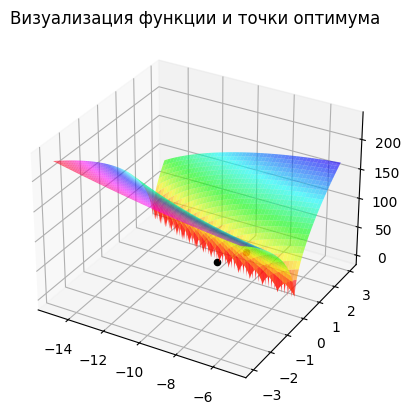

In [ ]:
plot(function_bukin_N6, -15.0, -5.0, -3.0, 3.0, (-10.0, 1.0, 0.0), res_bukin_N6)

In [ ]:
data = []
for i in range(10):
  x = random.uniform(-15.0, -5.0)
  y = random.uniform(-3.0, 3.0)
  res_boot = my_GD(x, y, f = function_bukin_N6, dfdx = function_bukin_N6_dx, dfdy = function_bukin_N6_dy)
  data.append([i + 1, float(res_boot[2] - 0.0)])

head = ["Запуск", "Погрешность"]
print(tabulate(data, headers=head, tablefmt="grid"))

+----------+---------------+
|   Запуск |   Погрешность |
+==========+===============+
|        0 |      35.8848  |
+----------+---------------+
|        1 |      35.842   |
+----------+---------------+
|        2 |     275.303   |
+----------+---------------+
|        3 |      12.8069  |
+----------+---------------+
|        4 |      30.3382  |
+----------+---------------+
|        5 |     526.731   |
+----------+---------------+
|        6 |       5.67016 |
+----------+---------------+
|        7 |     130.585   |
+----------+---------------+
|        8 |      21.598   |
+----------+---------------+
|        9 |      62.3689  |
+----------+---------------+


In [ ]:
def my_GD_momentum(x_0: float, y_0: float, use_grad: bool = True, lr: float = 1e-3, T: int = 10000, momentum: float = 0.1, **kwargs) -> np.ndarray:

  f = kwargs['f']
  if use_grad:
    dfdx = kwargs['dfdx']
    dfdy = kwargs['dfdy']
  else:
    raise NotImplementedError()

  x_old = x_0
  y_old = y_0

  bx = dfdx(x_old, y_old)
  by = dfdy(x_old, y_old)

  for i in range(T):

    if (i != 0):
      bx = momentum * bx + dfdx(x_old, y_old)
      by = momentum * by + dfdy(x_old, y_old)

    x_new = x_old - lr * bx
    y_new = y_old - lr * by

    x_old = x_new
    y_old = y_new

  return x_new, y_new, f(x_new, y_new)

In [ ]:
res_boot = my_GD_momentum(5.0, 10.0, f = function_boot, dfdx = function_boot_dx, dfdy = function_boot_dy)
print(res_boot)

(0.9999999996748559, 3.0000000003251444, 2.1143770432621079e-19)


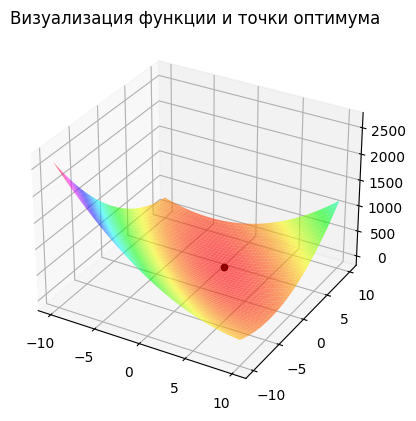

In [ ]:
plot(function_boot, -10.0, 10.0, -10.0, 10.0, (1.0, 3.0, 0.0), res_boot)

In [ ]:
data = []
for i in range(10):
  x = random.uniform(-10.0, 10.0)
  y = random.uniform(-10.0, 10.0)
  res_boot = my_GD(x, y, f = function_boot, dfdx = function_boot_dx, dfdy = function_boot_dy)
  data.append([i + 1, float(res_boot[2] - 0.0)])

head = ["Запуск", "Погрешность"]
print(tabulate(data, headers=head, tablefmt="grid"))

+----------+---------------+
|   Запуск |   Погрешность |
+==========+===============+
|        1 |     13.5783   |
+----------+---------------+
|        2 |     13.8522   |
+----------+---------------+
|        3 |      0.886734 |
+----------+---------------+
|        4 |     47.1115   |
+----------+---------------+
|        5 |     12.2111   |
+----------+---------------+
|        6 |     67.1008   |
+----------+---------------+
|        7 |     32.1016   |
+----------+---------------+
|        8 |     30.4015   |
+----------+---------------+
|        9 |     37.0767   |
+----------+---------------+
|       10 |      4.79966  |
+----------+---------------+


In [ ]:
def my_GD_adaptive(x_0: float, y_0: float, use_grad: bool = True, lr: float = 1, T: int = 1000, **kwargs) -> np.ndarray:

  f = kwargs['f']
  if use_grad:
    dfdx = kwargs['dfdx']
    dfdy = kwargs['dfdy']
  else:
    raise NotImplementedError()

  x_old = x_0
  y_old = y_0

  sum_x = 0
  sum_y = 0

  for i in range(T):

    sum_x += dfdx(x_old, y_old) ** 2
    sum_y += dfdy(x_old, y_old) ** 2

    x_new = x_old - lr * dfdx(x_old, y_old) / math.sqrt(sum_x)
    y_new = y_old - lr * dfdy(x_old, y_old) / math.sqrt(sum_y)

    x_old = x_new
    y_old = y_new

  return x_new, y_new, f(x_new, y_new)

In [ ]:
res_bukin_N6 = my_GD_adaptive(-7.0, 2.0, f = function_bukin_N6, dfdx = function_bukin_N6_dx, dfdy = function_bukin_N6_dy)
print(res_bukin_N6)

(-8.711223940639641, 0.767576314958625, 9.326325010776712)


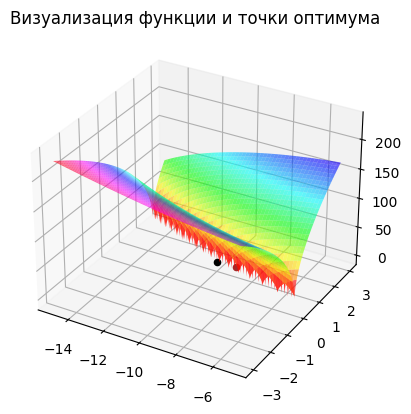

In [ ]:
plot(function_bukin_N6, -15.0, -5.0, -3.0, 3.0, (-10.0, 1.0, 0.0), res_bukin_N6)

In [ ]:
data = []
for i in range(10):
  x = random.uniform(-15.0, -5.0)
  y = random.uniform(-3.0, 3.0)
  res_boot = my_GD(x, y, f = function_bukin_N6, dfdx = function_bukin_N6_dx, dfdy = function_bukin_N6_dy)
  data.append([i + 1, float(res_boot[2] - 0.0)])

head = ["Запуск", "Погрешность"]
print(tabulate(data, headers=head, tablefmt="grid"))

+----------+---------------+
|   Запуск |   Погрешность |
+==========+===============+
|        1 |      29.1379  |
+----------+---------------+
|        2 |      21.0056  |
+----------+---------------+
|        3 |      22.0742  |
+----------+---------------+
|        4 |      67.287   |
+----------+---------------+
|        5 |     148.535   |
+----------+---------------+
|        6 |      38.5012  |
+----------+---------------+
|        7 |      36.4008  |
+----------+---------------+
|        8 |      34.4863  |
+----------+---------------+
|        9 |      95.768   |
+----------+---------------+
|       10 |       3.14673 |
+----------+---------------+


In [ ]:
def my_GD_lr(x_0: float, y_0: float, use_grad: bool = True, lr: float = 1e-3, lrs: int = 10, coef: float = 0.05, T: int = 10000, **kwargs) -> np.ndarray:

  f = kwargs['f']
  if use_grad:
    dfdx = kwargs['dfdx']
    dfdy = kwargs['dfdy']
  else:
    raise NotImplementedError()

  x_old = x_0
  y_old = y_0
  for i in range(T):

    if (i == lrs):
      lr = lr * coef

    x_new = x_old - lr * dfdy(x_old, y_old)
    y_new = y_old - lr * dfdy(x_old, y_old)

    x_old = x_new
    y_old = y_new

  return x_new, y_new, f(x_new, y_new)

In [ ]:
res_boot = my_GD_lr(5.0, 10.0, f = function_boot, dfdx = function_boot_dx, dfdy = function_boot_dy)
print(res_boot)

(-0.6660806058728543, 4.333919394127104, 4.9964898176476975)


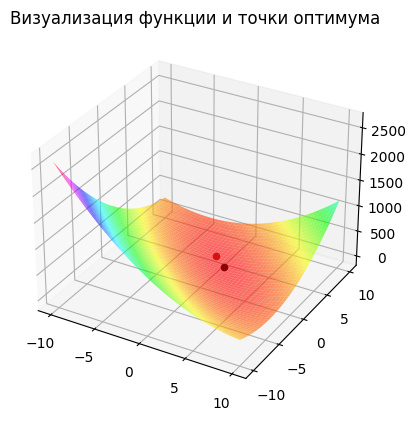

In [ ]:
plot(function_boot, -10.0, 10.0, -10.0, 10.0, (1.0, 3.0, 0.0), res_boot)

In [ ]:
data = []
for i in range(10):
  x = random.uniform(-10.0, 10.0)
  y = random.uniform(-10.0, 10.0)
  res_boot = my_GD(x, y, f = function_boot, dfdx = function_boot_dx, dfdy = function_boot_dy)
  data.append([i + 1, float(res_boot[2] - 0.0)])

head = ["Запуск", "Погрешность"]
print(tabulate(data, headers=head, tablefmt="grid"))

+----------+---------------+
|   Запуск |   Погрешность |
+==========+===============+
|        1 |   27.1519     |
+----------+---------------+
|        2 |    0.521199   |
+----------+---------------+
|        3 |    8.67668    |
+----------+---------------+
|        4 |    0.00196524 |
+----------+---------------+
|        5 |   70.9882     |
+----------+---------------+
|        6 |   13.8314     |
+----------+---------------+
|        7 |   32.2259     |
+----------+---------------+
|        8 |   26.3372     |
+----------+---------------+
|        9 |    0.109503   |
+----------+---------------+
|       10 |   10.462      |
+----------+---------------+
